In [3]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_data.shape

(60000, 28, 28)

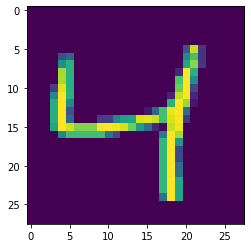

In [24]:
plt.imshow(train_data[2])

In [25]:
train_labels[2]

4

In [31]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_train=train_data.reshape((60000,28*28))
x_train=x_train.astype('float32')/255

x_test=test_data.reshape((10000,28*28))
x_test=x_test.astype('float32')/255


In [37]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [38]:
train_labels[0]

5

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [41]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 4ms/step - loss: 0.2569 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9887


In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9790


[0.07249299436807632, 0.9789999723434448]